# Práctica 3

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2



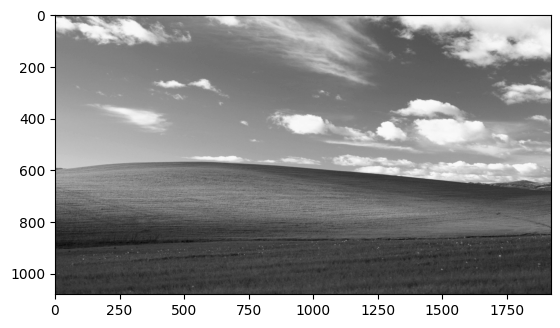

In [11]:
image = cv2.imread("./assets/bliss.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')


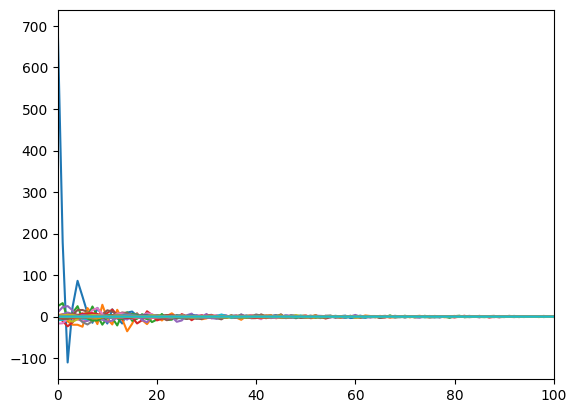

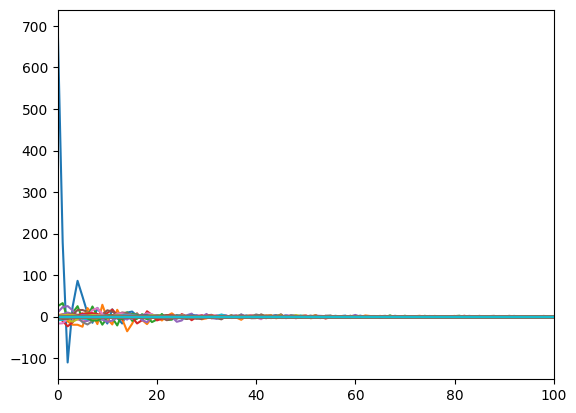

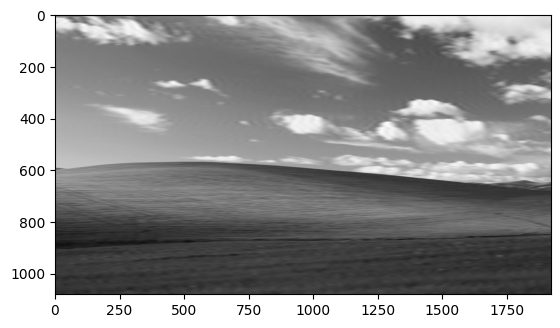

In [28]:
image_dct = cv2.dct(np.float32(image)/255.0)
plt.plot(image_dct)
plt.xlim(0, 100)
plt.figure()
image_dct[:,100:] = 0
plt.plot(image_dct)
plt.xlim(0, 100)
plt.figure()
inverse = cv2.idct(image_dct)*255.0
plt.imshow(inverse, cmap='gray')

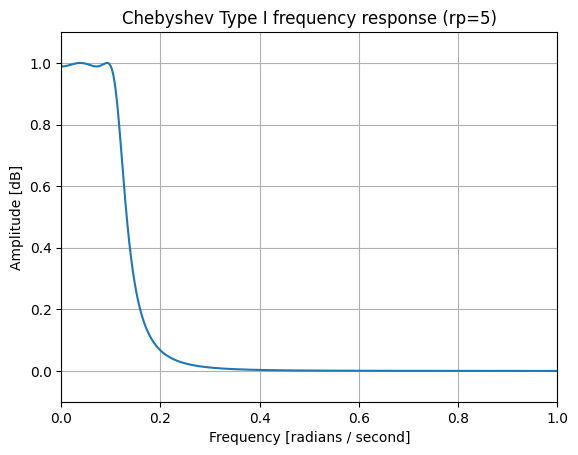

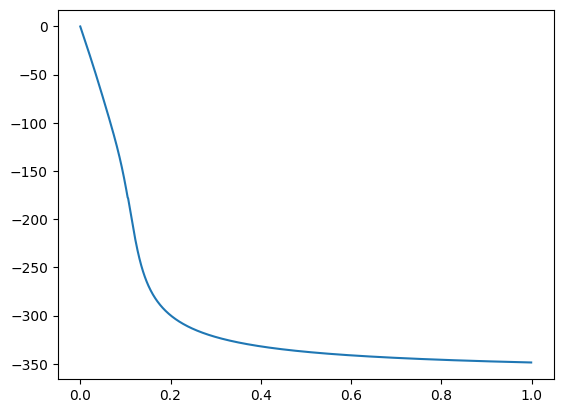

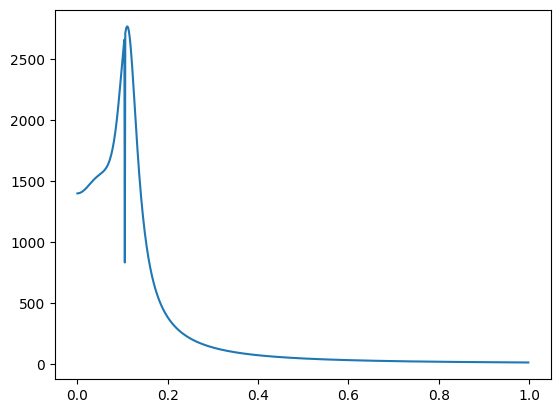

In [43]:
f_c = 0.1
z, p, k = sp.signal.cheby1(4, 0.1, Wn=f_c/np.pi, output="zpk")  # Chebyshev Type I
transfer_function = sp.signal.ZerosPolesGain(z, p, k, dt=0.1)
w, H = sp.signal.dfreqresp(transfer_function, np.arange(0, 1, 0.001))
angle = np.unwrap(np.angle(H, deg=True))
plt.plot(w, abs(H))
plt.title("Chebyshev Type I frequency response (rp=5)")
plt.xlabel("Frequency [radians / second]")
plt.xlim(0, 1)
plt.ylabel("Amplitude [dB]")
plt.margins(0, 0.1)
plt.grid(which="both", axis="both")
plt.axvline(100, color="green")  # cutoff frequency
plt.figure()
plt.plot(w, angle)

plt.show()
plt.figure()
derivative = -np.diff(angle)/np.diff(w)
plt.plot(w[:-1], derivative)


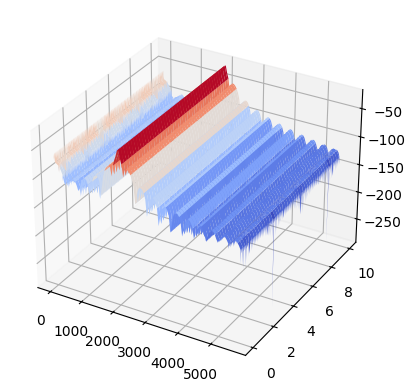

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # spectrogram function
from matplotlib import cm  # colour map

# basic config
sample_rate = 11240.0  #
sig_len_secs = 10
frequency = 2000.0

# generate the signal
timestamps_secs = np.arange(sample_rate * sig_len_secs) / sample_rate
mysignal = np.sin(2.0 * np.pi * frequency * timestamps_secs)

# extract the spectrum
freq_bins, timestamps, spec = signal.spectrogram(mysignal, sample_rate)

# 3d plot
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(
    freq_bins[:, None], timestamps[None, :], 10.0 * np.log10(spec), cmap=cm.coolwarm
)
plt.show()